In [13]:
import numpy as np
import itertools as it
%matplotlin inline
print('hello')

UsageError: Line magic function `%matplotlin` not found.


In [14]:
x = np.array([5.5,5,7,9])
x.astype(int)

array([5, 5, 7, 9])

In [15]:
random_vectors = np.random.choice(range(1, 11), size = (5,5,2))
norms = np.reshape(np.linalg.norm(random_vectors, axis=2), (5,5,1))

gradient_landscape = np.array(np.divide(random_vectors, norms))

def dotGridGradient(ix, x, gradient_landscape = gradient_landscape):
    # Compute the distance vector
    dx = x - ix
    grad_vector = gradient_landscape[ix[0], ix[1]]
    return np.dot(dx, grad_vector)


def perlin(x):
    #xs is 5 dimensional real vector
    #determine grid cell around point:
    x = np.array(x)
    x0 = x.astype(int)
    sx_base = x - x0
    #next we consider the other corners of the cube:
    dimensions = len(x)
    zero_add = list(it.product(range(2), repeat = dimensions))
    num_of_corners = len(zero_add)
    x1_corners = np.zeros((num_of_corners, dimensions))
    sx_distances = np.zeros(num_of_corners).tolist()
    for k in range(num_of_corners):
        x1_corners[k]= (x0 + list(zero_add[k]))
        sx_distances[k] = np.absolute(np.subtract(zero_add[k], sx_base))
    x1_corners = np.array(x1_corners).astype(int)

    corner_dot_gradients = zero_add
    for d in range(num_of_corners):
        corner_dot_gradients[d] = dotGridGradient(x1_corners[d], x)
        
    def interpolation():
        result = 0
        for d in range(num_of_corners):
            weights = np.ones(len(sx_distances[d])) - sx_distances[d]
            interpolation_factor = np.product(weights)
            contribution = interpolation_factor*corner_dot_gradients[d]
            #print('corner, inter factor, corner dot grad, contribution')
            #print(x1_corners[d], interpolation_factor, corner_dot_gradients[d],contribution)
            result += contribution
        return result
    
    return interpolation()

In [18]:
landscape = [[perlin([x/40,y/40]) for y in range(1,160)] for x in range(1,160)]
print('hello')

hello


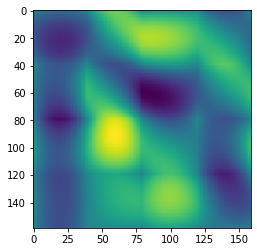

In [19]:

from matplotlib import pyplot as plt
plt.imshow(landscape, interpolation='nearest')
plt.show()